In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("../data/laptop_prices_preprocessed.csv")

In [3]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,Screen_Standard,Touchscreen_Yes,IPSpanel_Yes,RetinaDisplay_Yes,CPU_company_Intel,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,True,...,True,False,False,False,True,False,False,False,True,False
1,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,False,...,False,False,False,False,True,False,False,True,True,False
2,15.6,4.0,2.10,400.00,1366.0,768.0,3.0,500.0,0.0,False,...,True,False,False,False,False,True,False,False,False,False
3,13.3,8.0,1.34,1158.70,1440.0,900.0,1.8,256.0,0.0,True,...,True,False,False,False,True,False,False,False,True,False
4,14.0,8.0,1.60,770.00,1920.0,1080.0,1.6,256.0,0.0,False,...,False,False,True,False,True,False,False,True,True,False


In [4]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Inches                     628 non-null    float64
 1   Ram                        628 non-null    float64
 2   Weight                     628 non-null    float64
 3   Price_euros                628 non-null    float64
 4   ScreenW                    628 non-null    float64
 5   ScreenH                    628 non-null    float64
 6   CPU_freq                   628 non-null    float64
 7   PrimaryStorage             628 non-null    float64
 8   SecondaryStorage           628 non-null    float64
 9   Company_Apple              628 non-null    bool   
 10  Company_Asus               628 non-null    bool   
 11  Company_Chuwi              628 non-null    bool   
 12  Company_Dell               628 non-null    bool   
 13  Company_Fujitsu        

In [5]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
Inches                       float64
Ram                          float64
Weight                       float64
Price_euros                  float64
ScreenW                      float64
ScreenH                      float64
CPU_freq                     float64
PrimaryStorage               float64
SecondaryStorage             float64
Company_Apple                   bool
Company_Asus                    bool
Company_Chuwi                   bool
Company_Dell                    bool
Company_Fujitsu                 bool
Company_HP                      bool
Company_Huawei                  bool
Company_LG                      bool
Company_Lenovo                  bool
Company_MSI                     bool
Company_Mediacom                bool
Company_Microsoft               bool
Company_Samsung                 bool
Company_Toshiba                 bool
Company_Vero                    bool
Company_Xiaomi                  bool
TypeName_Gaming                 bool
TypeNa

In [6]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0
mean,14.652548,6.363057,1.810763,960.199156,1777.041401,1004.210191,2.235987,291.789809,0.0
std,1.162208,2.050877,0.428315,465.584129,272.435840,162.278927,0.466874,138.699291,0.0
min,12.000000,2.000000,0.810000,196.000000,1366.000000,768.000000,1.100000,16.000000,0.0
25%,14.000000,4.000000,1.450000,589.750000,1366.000000,768.000000,1.800000,256.000000,0.0
50%,15.600000,8.000000,1.860000,913.000000,1920.000000,1080.000000,2.450000,256.000000,0.0
75%,15.600000,8.000000,2.162500,1270.750000,1920.000000,1080.000000,2.500000,500.000000,0.0
max,17.300000,12.000000,3.140000,2135.000000,2560.000000,1504.000000,3.000000,512.000000,0.0


In [7]:
# Modelos Supervisados

# Preparación de los datos

# Separar variables predictoras y variable objetivo
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables predictoras
scaler = StandardScaler()

numeric_cols = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Mostrar las formas de los conjuntos resultantes
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (502, 47), (502,)
Datos de prueba: (126, 47), (126,)


In [8]:
# Regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

Error Cuadrático Medio: 59001.80363525369
R²: 0.7068927570217696


In [9]:
# Visualización de resultados
df_pred_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr, 'Error': y_test - y_pred_lr}) 
df_pred_lr 

,Actual,Predicted,Error
581,1499.0,1594.481299,-95.481299
591,831.0,1345.435767,-514.435767
550,387.0,171.354976,215.645024
213,1179.0,1260.610316,-81.610316
485,1908.0,1548.291518,359.708482
...,...,...,...
535,1458.0,1466.425647,-8.425647
319,919.0,762.373872,156.626128
218,1345.0,1180.846991,164.153009
344,795.0,1031.584194,-236.584194


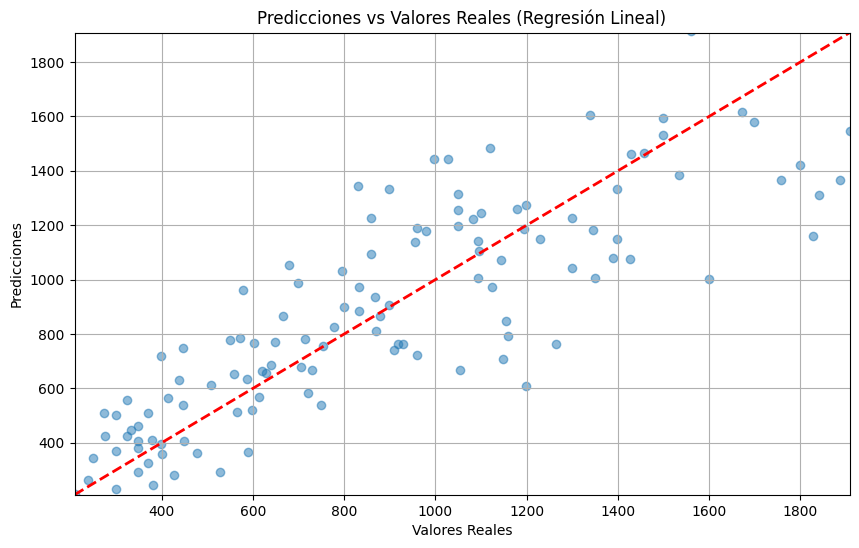

In [10]:
# Grafica de predicciones vs valores reales para regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

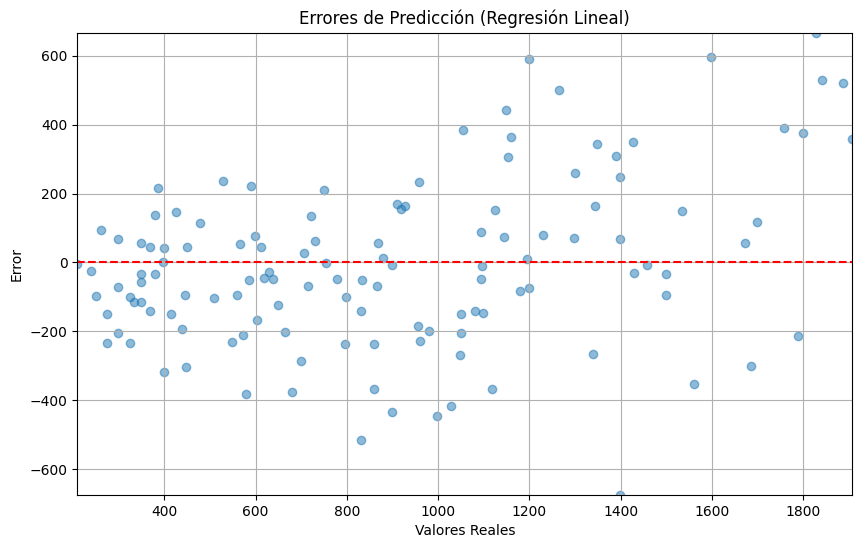

In [11]:
# Grafica de errores para regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_lr['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_lr['Error'].min(), df_pred_lr['Error'].max())
plt.grid()
plt.show()

In [12]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

Error Cuadrático Medio: 48655.207093574674
R²: 0.758292243133879


In [13]:
# Visualización de resultados
df_pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf, 'Error': y_test - y_pred_rf})
df_pred_rf

,Actual,Predicted,Error
581,1499.0,1474.397600,24.602400
591,831.0,888.294500,-57.294500
550,387.0,386.200600,0.799400
213,1179.0,1306.956700,-127.956700
485,1908.0,1473.855000,434.145000
...,...,...,...
535,1458.0,1538.339000,-80.339000
319,919.0,850.067642,68.932358
218,1345.0,1177.221700,167.778300
344,795.0,820.102800,-25.102800


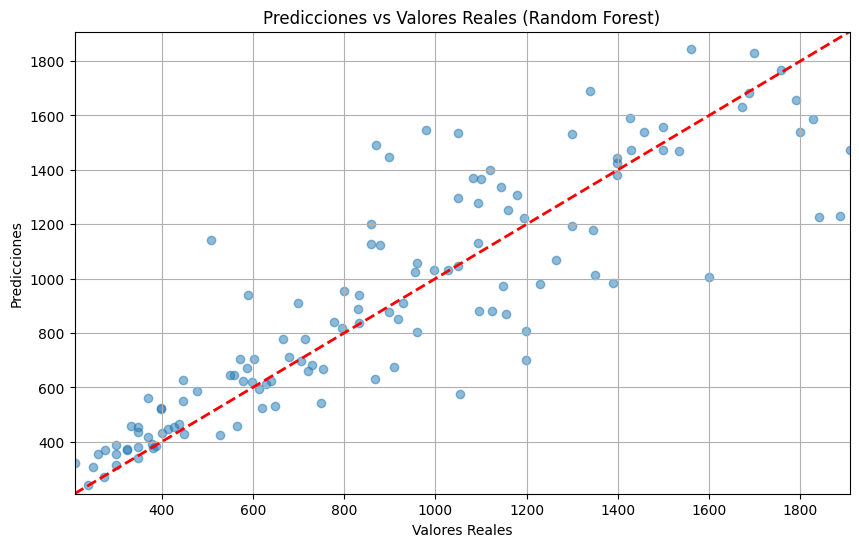

In [14]:
# Grafica de predicciones vs valores reales para Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

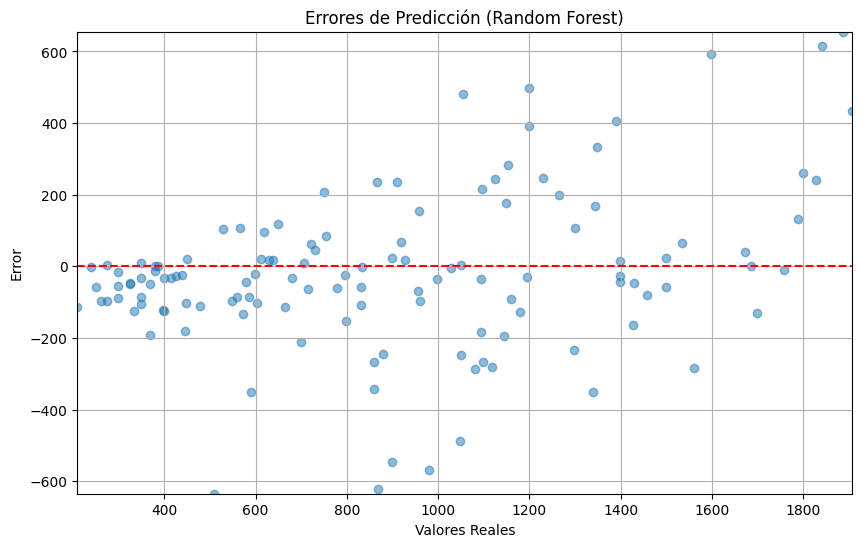

In [15]:
# Grafica de errores para random forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_rf['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_rf['Error'].min(), df_pred_rf['Error'].max())
plt.grid()
plt.show()

In [46]:
# Redes Neuronales
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluación del modelo
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_mlp)}")
print(f"R²: {r2_score(y_test, y_pred_mlp)}")

Error Cuadrático Medio: 52997.0191749102
R²: 0.7367231301529084


c:\Users\juanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
# Visualización de resultados
df_pred_mlp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp, 'Error': y_test - y_pred_mlp})
df_pred_mlp

,Actual,Predicted,Error
581,1499.0,1683.087324,-184.087324
591,831.0,1418.809059,-587.809059
550,387.0,366.277724,20.722276
213,1179.0,1184.805048,-5.805048
485,1908.0,2001.732679,-93.732679
...,...,...,...
535,1458.0,1603.017466,-145.017466
319,919.0,817.975618,101.024382
218,1345.0,1204.594867,140.405133
344,795.0,1078.701068,-283.701068


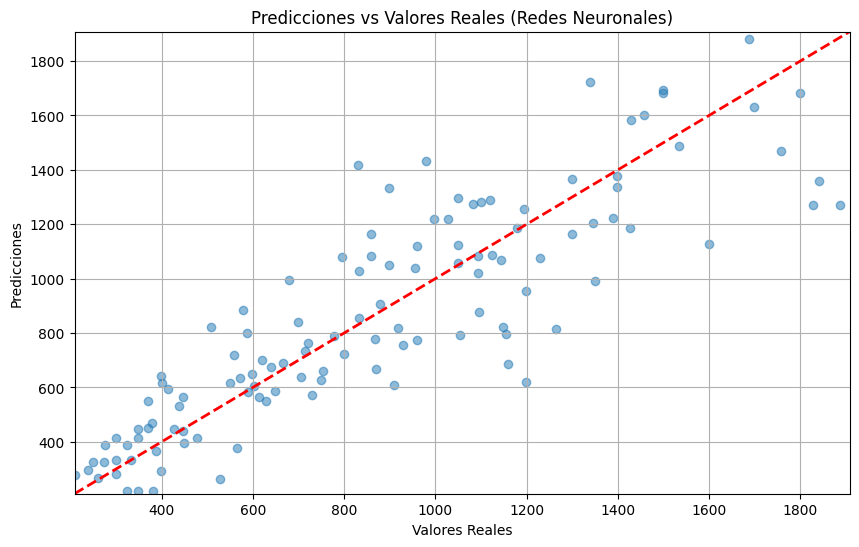

In [48]:
# Grafica de predicciones vs valores reales para MLP Redes Neuronales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Redes Neuronales)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

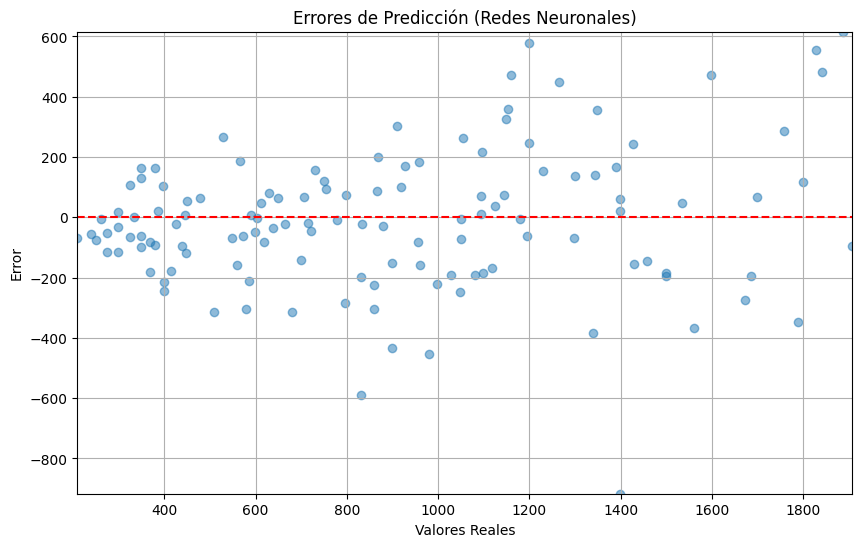

In [49]:
# Grafica de errores para MLP Redes Neuronales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_mlp['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Redes Neuronales)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_mlp['Error'].min(), df_pred_mlp['Error'].max())
plt.grid()
plt.show()

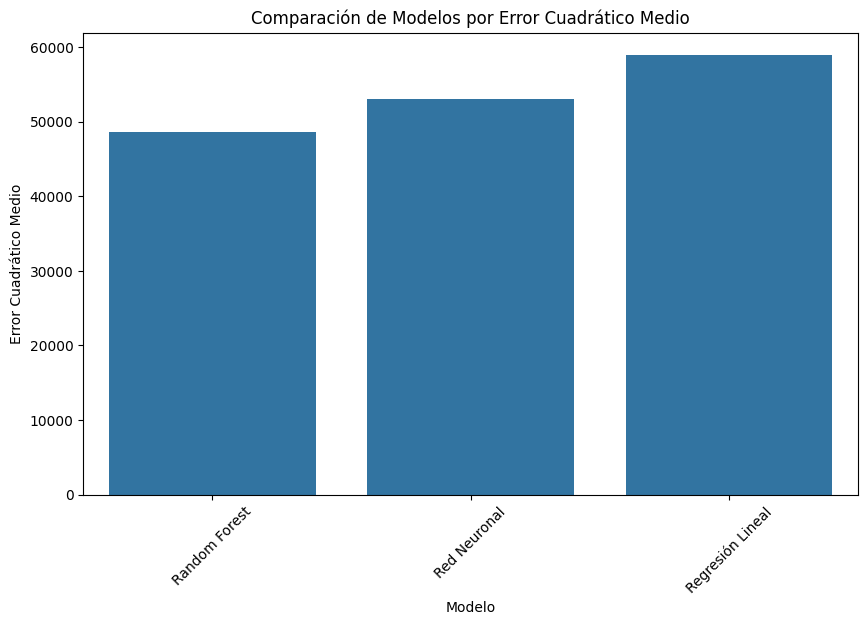

In [50]:
# Comparación de modelos regresion lineal, random forest y red neuronal por error cuadrático medio
mse = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Red Neuronal'],
    'MSE': [mse_lr, mse_rf, mse_mlp]
})
mse = mse.sort_values(by='MSE', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=mse, x='Modelo', y='MSE')
plt.title('Comparación de Modelos por Error Cuadrático Medio')
plt.ylabel('Error Cuadrático Medio')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

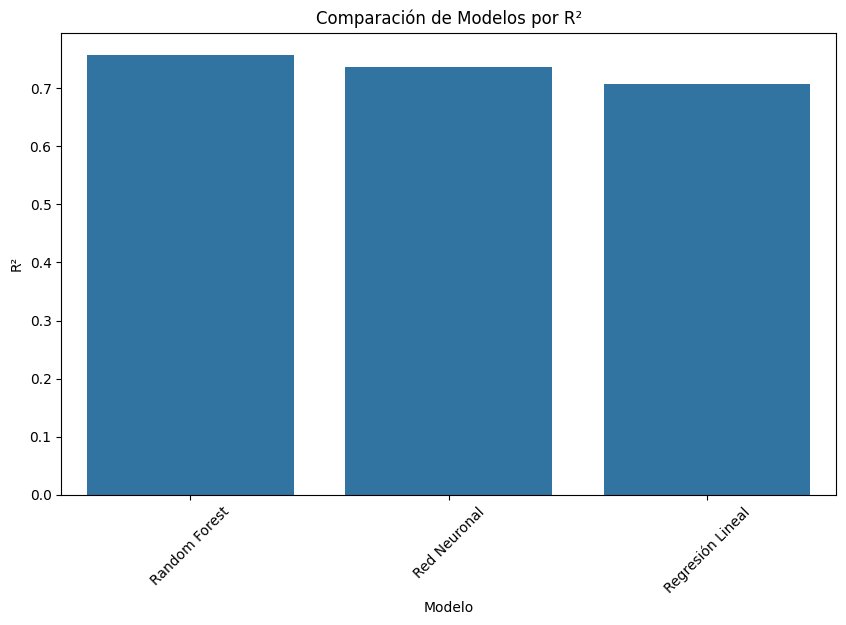

In [51]:
# Comparacion de modelos regresion lineal, random forest y red neuronal por R²
r2 = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Red Neuronal'],
    'R²': [r2_lr, r2_rf, r2_mlp]
})
r2 = r2.sort_values(by='R²', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=r2, x='Modelo', y='R²')
plt.title('Comparación de Modelos por R²')
plt.ylabel('R²')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

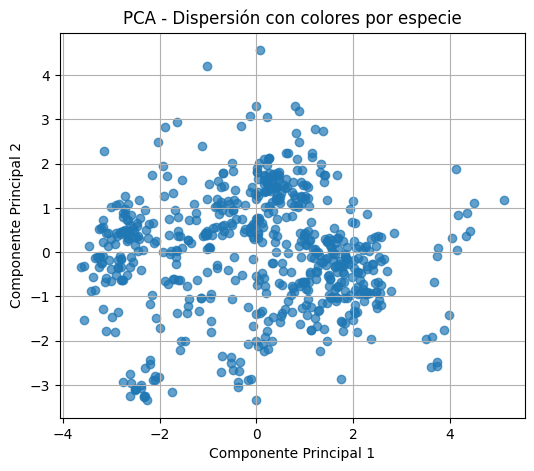

In [52]:
# Modelos No Supervisados

# Preparación de los datos

scaler = StandardScaler()

# Usar solo las columnas numéricas para el clustering
numeric_cols = ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

data = df[numeric_cols]
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# ----------- VISUALIZACIÓN DE PCA -----------

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Dispersión con colores por especie")
plt.grid()
plt.show()

In [53]:
# KMeans Clustering

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(data_scaled)
clusters_kmeans = kmeans.labels_  

df_kmeans = data.copy()
df_kmeans['Cluster'] = clusters_kmeans
df_kmeans

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Cluster
0,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,0
1,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,2
2,15.6,4.0,2.10,400.00,1366.0,768.0,3.0,500.0,0.0,1
3,13.3,8.0,1.34,1158.70,1440.0,900.0,1.8,256.0,0.0,0
4,14.0,8.0,1.60,770.00,1920.0,1080.0,1.6,256.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
623,15.6,2.0,2.20,379.00,1366.0,768.0,1.6,500.0,0.0,1
624,15.6,4.0,2.20,720.32,1366.0,768.0,2.5,500.0,0.0,1
625,14.0,4.0,1.80,638.00,1920.0,1080.0,2.5,128.0,0.0,0
626,14.0,2.0,1.50,229.00,1366.0,768.0,1.6,64.0,0.0,1


In [54]:
# Análisis de características por cluster en K-Means
cluster_means_kmeans = df_kmeans.groupby('Cluster').mean()
cluster_means_kmeans

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Cluster,,,,,,,,,
0,13.528906,7.296875,1.423977,1245.772383,1934.789062,1099.906250,2.259297,268.359375,0.0
1,15.051497,4.395210,1.960479,569.655030,1367.401198,768.790419,2.083473,335.161677,0.0
2,15.730732,6.800000,2.171810,921.731463,1913.756098,1076.487805,2.331122,285.717073,0.0


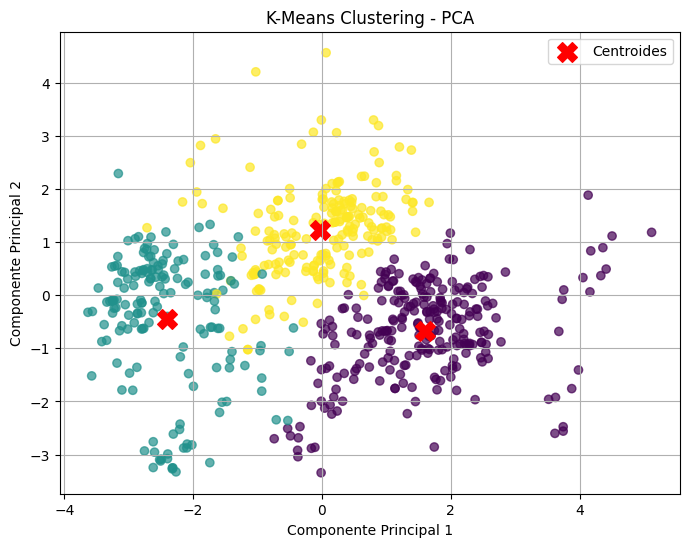

In [55]:
# Visualización de los clusters K-Means
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)

centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("K-Means Clustering - PCA")
plt.legend()
plt.grid()
plt.show()

In [56]:
# Resultados de KMeans
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
print(f"Silhouette Score K-Means: {silhouette_kmeans:.4f}")
dbi_kmeans = davies_bouldin_score(data_scaled, clusters_kmeans)
print(f"Davies-Bouldin Index K-Means: {dbi_kmeans:.4f}")


Silhouette Score K-Means: 0.2909
Davies-Bouldin Index K-Means: 1.3193


In [57]:
# GMM Clustering
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42, n_init=10)
gmm.fit(data_scaled)
clusters_gmm = gmm.predict(data_scaled)

df_gmm = data.copy()
df_gmm['Cluster'] = clusters_gmm
df_gmm

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Cluster
0,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,0
1,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,2
2,15.6,4.0,2.10,400.00,1366.0,768.0,3.0,500.0,0.0,1
3,13.3,8.0,1.34,1158.70,1440.0,900.0,1.8,256.0,0.0,0
4,14.0,8.0,1.60,770.00,1920.0,1080.0,1.6,256.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
623,15.6,2.0,2.20,379.00,1366.0,768.0,1.6,500.0,0.0,1
624,15.6,4.0,2.20,720.32,1366.0,768.0,2.5,500.0,0.0,1
625,14.0,4.0,1.80,638.00,1920.0,1080.0,2.5,128.0,0.0,2
626,14.0,2.0,1.50,229.00,1366.0,768.0,1.6,64.0,0.0,1


In [58]:
# Análisis de características por cluster en GMM
cluster_means_gmm = df_gmm.groupby('Cluster').mean()
cluster_means_gmm

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Cluster,,,,,,,,,
0,13.146154,7.692308,1.220692,1398.404231,2214.769231,1360.000000,2.027692,306.461538,0.0
1,14.944509,4.520231,1.929942,603.546185,1366.000000,768.000000,2.095029,330.566474,0.0
2,14.626107,7.025641,1.798464,1077.466364,1916.270396,1077.902098,2.305455,275.263403,0.0


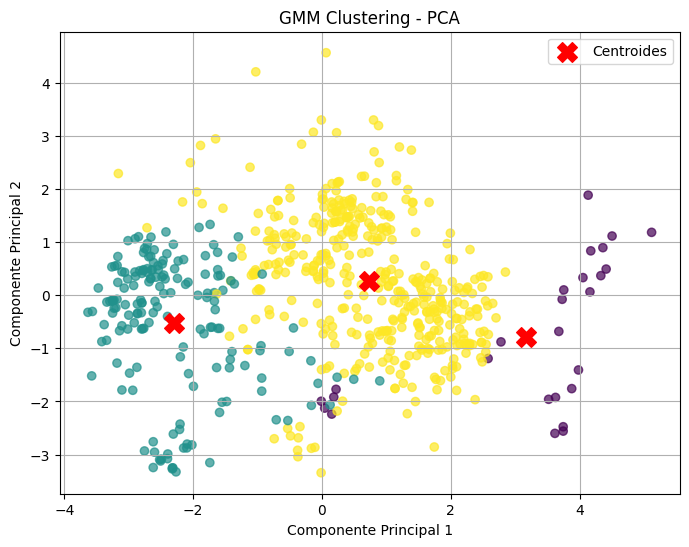

In [59]:
# Visualización de los clusters GMM
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_gmm, cmap='viridis', alpha=0.7)

centroids_gmm = pca.transform(gmm.means_)

plt.scatter(centroids_gmm[:, 0], centroids_gmm[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("GMM Clustering - PCA")
plt.legend()
plt.grid()
plt.show()

In [60]:
# Resultados de GMM
silhouette_gmm = silhouette_score(data_scaled, clusters_gmm)
print(f"Silhouette Score GMM: {silhouette_gmm:.4f}")
dbi_gmm = davies_bouldin_score(data_scaled, clusters_gmm)
print(f"Davies-Bouldin Index GMM: {dbi_gmm:.4f}")

Silhouette Score GMM: 0.2826
Davies-Bouldin Index GMM: 1.5489


In [61]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(data_scaled)
clusters_dbscan = dbscan.labels_

df_dbscan = data.copy()
df_dbscan['Cluster'] = clusters_dbscan
df_dbscan

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Cluster
0,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,-1
1,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,0
2,15.6,4.0,2.10,400.00,1366.0,768.0,3.0,500.0,0.0,-1
3,13.3,8.0,1.34,1158.70,1440.0,900.0,1.8,256.0,0.0,-1
4,14.0,8.0,1.60,770.00,1920.0,1080.0,1.6,256.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
623,15.6,2.0,2.20,379.00,1366.0,768.0,1.6,500.0,0.0,-1
624,15.6,4.0,2.20,720.32,1366.0,768.0,2.5,500.0,0.0,2
625,14.0,4.0,1.80,638.00,1920.0,1080.0,2.5,128.0,0.0,17
626,14.0,2.0,1.50,229.00,1366.0,768.0,1.6,64.0,0.0,5


In [62]:
# Análisis de características por cluster en DBSCAN
cluster_means_dbscan = df_dbscan.groupby('Cluster').mean()
cluster_means_dbscan

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Cluster,,,,,,,,,
-1,14.619636,6.0,1.803156,978.532036,1788.945455,1016.974545,2.172218,297.978182,0.0
0,15.600000,8.0,2.139597,1006.342083,1920.000000,1080.000000,2.570833,256.000000,0.0
1,14.000000,8.0,1.648333,981.783333,1920.000000,1080.000000,1.666667,256.000000,0.0
2,15.600000,4.0,2.099355,499.809355,1366.000000,768.000000,2.116129,500.000000,0.0
3,13.300000,8.0,1.507143,909.984286,1920.000000,1080.000000,1.685714,256.000000,0.0
4,15.600000,8.0,2.092353,774.619412,1920.000000,1080.000000,1.752941,256.000000,0.0
5,14.000000,2.0,1.511429,249.400000,1366.000000,768.000000,1.562857,36.571429,0.0
6,14.016667,4.0,1.526667,292.000000,1366.000000,768.000000,1.100000,37.333333,0.0
7,15.600000,4.0,2.166667,451.444444,1366.000000,768.000000,2.066667,128.000000,0.0


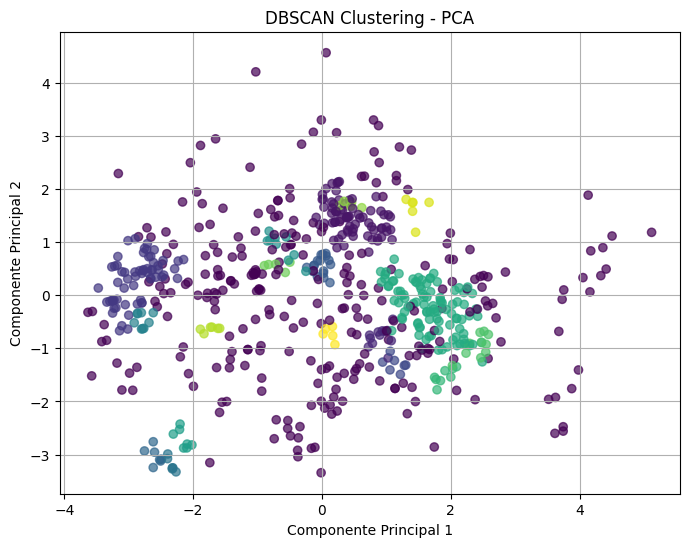

In [63]:
# Visualización de los clusters DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_dbscan, cmap='viridis', alpha=0.7)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("DBSCAN Clustering - PCA")
plt.grid()
plt.show()

In [64]:
# Resultados de DBSCAN
filtered_data = data_scaled[clusters_dbscan != -1]
filtered_clusters = clusters_dbscan[clusters_dbscan != -1]

silhouette_dbscan = silhouette_score(filtered_data, filtered_clusters)
print(f"Silhouette Score DBSCAN: {silhouette_dbscan:.4f}")
dbi_dbscan = davies_bouldin_score(filtered_data, filtered_clusters)
print(f"Davies-Bouldin Index DBSCAN: {dbi_dbscan:.4f}")


Silhouette Score DBSCAN: 0.3922
Davies-Bouldin Index DBSCAN: 0.7238


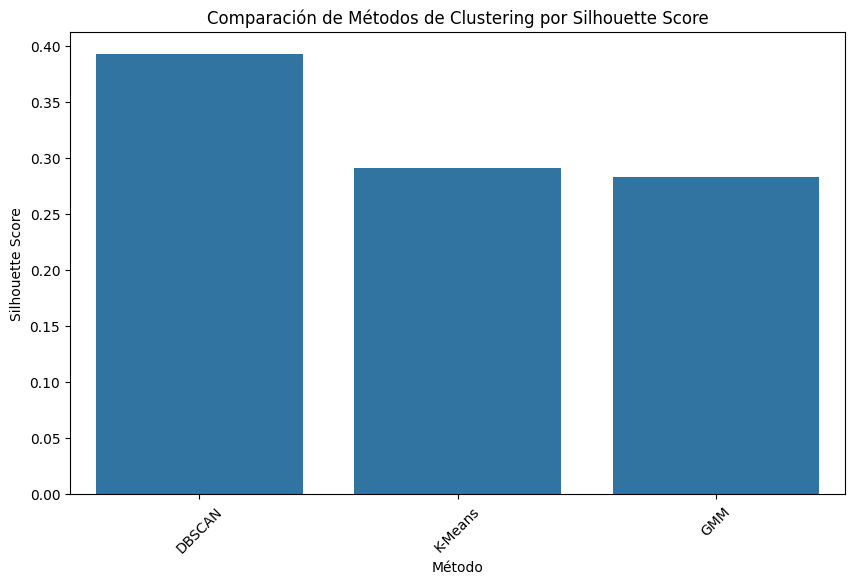

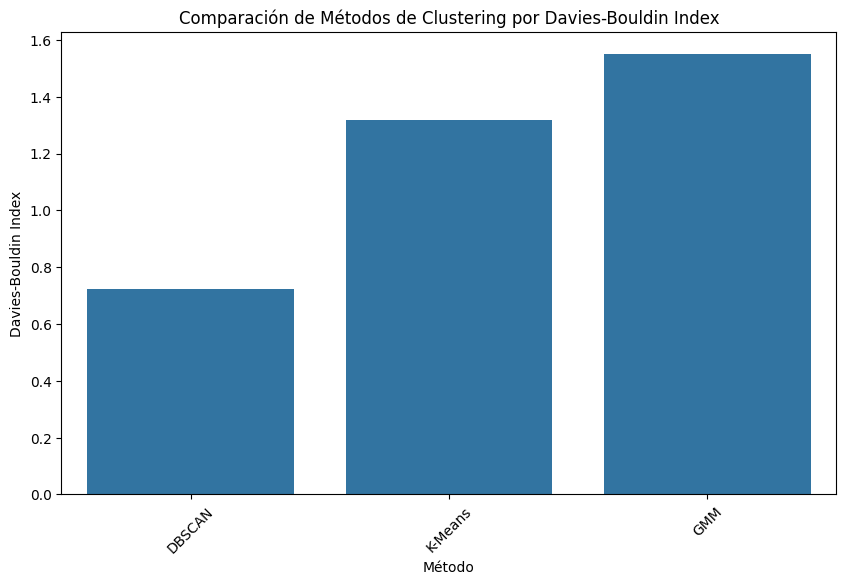

In [65]:
# Comparación de resultados de clustering por Silhouette Score
results = pd.DataFrame({
    'Método': ['K-Means', 'GMM', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette_gmm, silhouette_dbscan],
    'Davies-Bouldin Index': [dbi_kmeans, dbi_gmm, dbi_dbscan]
})
results = results.sort_values(by='Silhouette Score', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Método', y='Silhouette Score')
plt.title('Comparación de Métodos de Clustering por Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Método')
plt.xticks(rotation=45)
plt.show()

# Comparación de resultados de clustering por Davies-Bouldin Index
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Método', y='Davies-Bouldin Index')
plt.title('Comparación de Métodos de Clustering por Davies-Bouldin Index')
plt.ylabel('Davies-Bouldin Index')
plt.xlabel('Método')
plt.xticks(rotation=45)
plt.show()